In [752]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [753]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [754]:
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [755]:
x = np.linspace(-5,5)

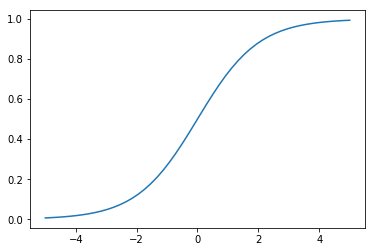

In [756]:
plt.plot(x,sigmoid(x))

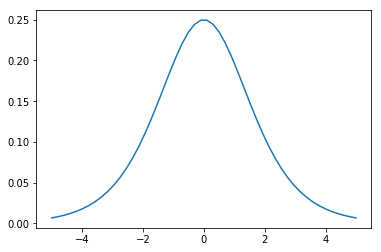

In [757]:
plt.plot(x,der_sigmoid(x))

In [758]:
def tanh(x):
    return np.tanh(x)

In [759]:
def der_tanh(x):
    return 1-np.power(np.tanh(x),2)

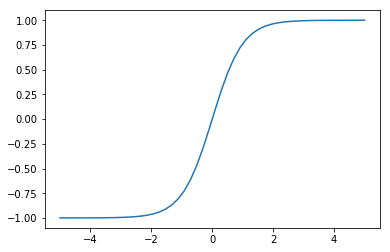

In [760]:
plt.plot(x,tanh(x))

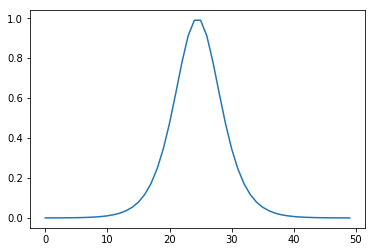

In [761]:
plt.plot(der_tanh(x))

In [762]:
def relu(x):
    v=x
    v[x<0]=0
    return v

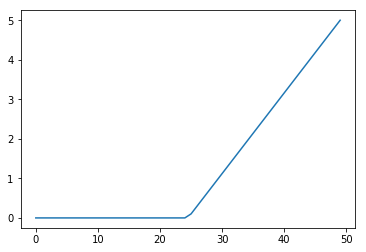

In [763]:
plt.plot(relu(x))

In [764]:
def der_relu(x):
    v=x
    v[x<0]=0
    v[x>0]=1
    return v

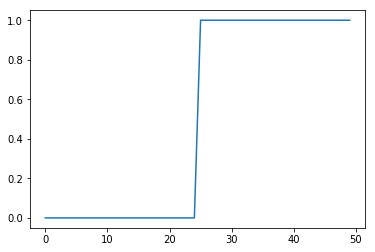

In [765]:
plt.plot(der_relu(x))

In [857]:
def cross_entropy(yh,y):
    yh[yh<10^-10]=10^-10
    yh[yh>(1-10^-10)]=(1-10^-10)
    return -y*np.log(yh)-(1-y)*np.log(1-yh)

In [858]:
def der_cross_entropy(yh,y):
    yh[yh<10^-10]=10^-10
    yh[yh>(1-10^-10)]=(1-10^-10)
    return -y/yh+(1-y)/(1-yh)

In [859]:
def build_network(input_size,layers,activations,loss):
    network = {'nb_layers' : len(layers),
               'input_size': input_size,
               'activations':activations,
               'weights':[],
               'loss':loss}
    weights = []
    for l in range(0,len(layers)):
        if (l>0):
            # +1 for b
            weights.append(np.random.normal(size=[layers[l],layers[l-1]+1]))
        else:
            weights.append(np.random.normal(size=[layers[l],input_size+1]))
    network["weights"]=weights
    return network
    

In [1027]:
network=build_network(5,[15,10,1],['relu','relu','sigmoid'],'cross_entropy')

In [1028]:
def forward(network,X):
    S=[]
    S.append(X)
    for l in range(1,network["nb_layers"]+1):
        Sp=np.concatenate([S[l-1],np.ones([1,1])])
        Sn=sigmoid(np.matmul(network["weights"][l-1],Sp))
        S.append(Sn)
    return S

In [1029]:
X=np.random.normal(size=[5,1])
y=np.zeros(1)

In [1030]:
np.ones((1,1))

array([[1.]])

In [1031]:
S = forward(network,X)

In [1034]:
def backward(network,S,y):
    L = len(S)-1
    eta = der_cross_entropy(S[L],y)
    grad = []
    for l in range(L,0,-1):
        print(l)
        eta = eta*np.repeat(der_sigmoid(S[l]),repeats=S[l-1].shape[0]+1,axis=1)
        Sp  = np.concatenate([S[l-1],np.ones([1,1])])
        print(eta.shape)
        Spm=np.repeat(np.transpose(Sp),repeats=S[l].shape[0],axis=0)
        print(Spm.shape)
        grad.append(eta*Spm)
    grad.reverse()
    return grad

In [1035]:
G = backward(network,S,y)

3
(1, 11)
(1, 11)
2


ValueError: operands could not be broadcast together with shapes (1,11) (10,16) 

In [1020]:
network["weights"]

[array([[ 0.2690422 , -0.11696696, -2.84656174]])]

In [1021]:
def update(network,X,y,step):
    S=forward(network,X);
    G=backward(network,S,y);
    for l in range(0,network["nb_layers"]):
        network["weights"][l]=network["weights"][l]-step*G[l]
    return network

In [1022]:
def predict(network,X):
    yh=[]
    for i in range(0,X.shape[0]):
        S=forward(network,np.reshape(X[i,:],(2,1)))
        yh.append(S[len(S)-1][0][0])
    return np.array(yh)

In [1023]:
network = update(network,X,y,0.0001)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [1038]:
X = np.concatenate([np.random.normal([-5,-5],size=[100,2]),
                    np.random.normal([-5,5],size=[100,2]),
                    np.random.normal([5,-5],size=[100,2]),
                    np.random.normal([5,5],size=[100,2])])
y = np.concatenate([np.ones(200),np.zeros(200)])

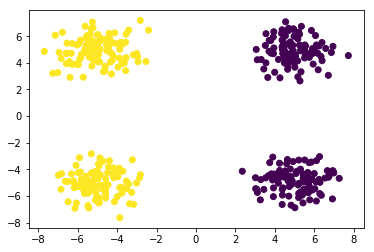

In [1039]:
plt.scatter(X[:,0],X[:,1],c=y)

In [1040]:
network=build_network(2,[1],['sigmoid','sigmoid','sigmoid'],'cross_entropy')
nbe=10
for e in range(0,nbe):
    perm = np.random.permutation(400)
    for i in perm :
        network = update(network,np.reshape(X[i,:],(2,1)),np.array([y[i]]),0.001)
    yh=predict(network,X)
    print(np.sum(cross_entropy(yh,y)))

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(

(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
0.20332932837718137
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(

In [1041]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
Xc=scaler.transform(X)

In [1042]:
network=build_network(2,[1],['sigmoid','sigmoid','sigmoid'],'cross_entropy')
nbe=10
for e in range(0,nbe):
    perm = np.random.permutation(400)
    for i in perm :
        network = update(network,np.reshape(Xc[i,:],(2,1)),np.array([y[i]]),0.01)
    yh=predict(network,X)
    print(np.sum(cross_entropy(yh,y)))

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
0.0010750510366850194
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1


1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

/home/come/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/come/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)
(1, 3)
1
(1, 3)

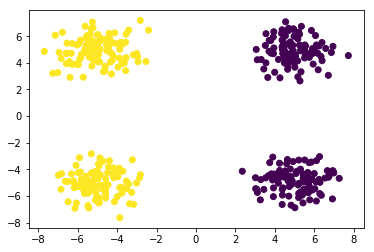

In [1043]:
plt.scatter(X[:,0],X[:,1],c=yh>0.5)

In [680]:
S=forward(network,np.transpose(X[:10,]))

In [681]:
G=backward(network,S,y[:10])

ValueError: operands could not be broadcast together with shapes (1,20) (200,) 